# Cleaning Weather Data from Kaggle User tobycrabtree
This is a notebook to clean the weather [data](https://www.kaggle.com/tobycrabtree/nfl-scores-and-betting-data?select=spreadspoke_scores.csv) provided by kaggle user tobycrabtree, which was ingested using the [kaggle API](https://github.com/Kaggle/kaggle-api) instead of a python script.  
In this script, I intend to:  
- standardize all column names as CamelCase with all special characters removed
- find all null values and address them appropriately
- fill in missing data as needed  
- Narrow the data to the 2019 and 2020 regular seasons

At the end of this notebook, I'll write the cleaned data to ../../fixtures/cleaned_data/tobycrabtree_cleaned.csv  

Table of Contents:  
- [Import Packages and Read in Data](#import_and_read_cell)
- [Understanding Data](#understanding_cell)
    - [Answering Initial Questions](#answering_cell)

## Import Packages and Read in Data
<a id='import_and_read_cell'></a>
We'll start by importing pandas to manipulate and store the data, then matplotlib's pyplot module, seaborn, and missingno to visualize the data. We'll also set up Jupyter magic to visualize pyplot visualizations inline. Finally, we'll read the data into a dataframe.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [4]:
%matplotlib inline

In [3]:
df = pd.read_csv('../../fixtures/raw_data/spreadspoke_scores.csv')

## Understanding the Data
<a id='understanding_cell'></a>

In [24]:
df.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62,NaN


### Initial observations, to-dos, and questions from looking at the first few rows
#### Questions I have about the data:
- How many rows and columns are in the dataset?
- What are the data types contained in the columns?
- Are there any games not played at the home team's stadium?
- The weather_temperature and weather_wind_mph columns are floats, but weather_humidity column is an integer. Is this distinction reflected in the data?
- The first few rows of the weather_detail column are NaN. What is contained in the weather_detail column?

#### Things to do to the data:
- This dataset has the following columns, which I can use to produce columns for the database:
    - schedule_week and schedule_year columns -> week_id column
    - schedule_date -> days_since_last_game and week_day columns
    - team_home and team_away -> location column, team_name, and opponent columns within the opponents_table
- This dataset looks like it contains playoff data, so I'll neeed to filter that out
- team_home and team_away columns need to be translated into the abbreviations that are the column names in thee opponents_table
- score_home and score_away are floats and need to be changed to integers
- Drop the team_favorite_id, spread_favorite, and over_under_line columns as these aren't applicable for this project

### Answering Initial Questions
<a id='answering_cell'></a>

In [25]:
# How many rows and columns are in the dataset?
# Create a variable that produces the number of rows and columns in the dataset

df_shape = "There are {} rows and {} columns in this dataset".format(df.shape[0], df.shape[1])
print(df_shape)

There are 12947 rows and 17 columns in this dataset


In [42]:
# What are the data types contained in the columns?

df.dtypes

schedule_date           object
schedule_season          int64
schedule_week           object
schedule_playoff          bool
team_home               object
score_home             float64
score_away             float64
team_away               object
team_favorite_id        object
spread_favorite        float64
over_under_line         object
stadium                 object
stadium_neutral           bool
weather_temperature    float64
weather_wind_mph       float64
weather_humidity        object
weather_detail          object
dtype: object

In [ ]:
# Are there any games not played at the home team's stadium?

In [80]:
# The weather_temperature and weather_wind_mph columns are floats, but weather_humidity column is an integer.
# Is this distinction reflected in the data?

def float_checker(df, cols):
    """
    Check whether a column actually contains floats with non-zero decimals.
    Inputs: dataframe and list of columns to check
    """
    for n in cols:
        for x in n:
            if (str(df[n][x])[-1] != '0') and (str(df[n][x])[-1] != 'nan'):
                print(x)
            else:
                pass

weather_cols = ['weather_temperature','weather_wind_mph','weather_humidity']

float_checker(df, weather_cols)

KeyError: 'w'

In [27]:
# The first few rows of the weather_detail column are NaN. What is contained in the weather_detail column?

Change score_home and score_away to integer   
Why is spread_favorite a float?   
Filter out all but 2019 and 2020  
Find weather data for non-enclosed stadium

In [7]:
df = df[df['schedule_season'] >= 2019]

In [8]:
df.shape

(536, 17)

In [9]:
df.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
12411,9/5/2019,2019,1,False,Chicago Bears,3.0,10.0,Green Bay Packers,CHI,-3.0,46.5,Soldier Field,False,NaN,NaN,NaN,NaN
12412,9/8/2019,2019,1,False,Arizona Cardinals,27.0,27.0,Detroit Lions,DET,-3.0,45.5,University of Phoenix Stadium,False,72.0,0.0,NaN,DOME
12413,9/8/2019,2019,1,False,Carolina Panthers,27.0,30.0,Los Angeles Rams,LAR,-2.0,49.5,Bank of America Stadium,False,NaN,NaN,NaN,NaN
12414,9/8/2019,2019,1,False,Cleveland Browns,13.0,43.0,Tennessee Titans,CLE,-5.5,44,FirstEnergy Stadium,False,NaN,NaN,NaN,NaN
12415,9/8/2019,2019,1,False,Dallas Cowboys,35.0,17.0,New York Giants,DAL,-7.0,44,AT&T Stadium,False,72.0,0.0,NaN,DOME


In [10]:
df['weather_detail'].unique()

array([nan, 'DOME'], dtype=object)

In [11]:
df['weather_wind_mph'].unique()

array([nan,  0.])

In [12]:
df['weather_temperature'].unique()

array([nan, 72.])

In [13]:
weather_dome_test = df[df['weather_detail']=='DOME']

In [14]:
weather_dome_test[weather_dome_test['weather_temperature'] == 72.0]

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
12412,9/8/2019,2019,1,False,Arizona Cardinals,27.0,27.0,Detroit Lions,DET,-3.0,45.5,University of Phoenix Stadium,False,72.0,0.0,NaN,DOME
12415,9/8/2019,2019,1,False,Dallas Cowboys,35.0,17.0,New York Giants,DAL,-7.0,44,AT&T Stadium,False,72.0,0.0,NaN,DOME
12419,9/8/2019,2019,1,False,Minnesota Vikings,28.0,12.0,Atlanta Falcons,MIN,-3.5,47,U.S. Bank Stadium,False,72.0,0.0,NaN,DOME
12425,9/9/2019,2019,1,False,New Orleans Saints,30.0,28.0,Houston Texans,NO,-6.5,51.5,Mercedes-Benz Superdome,False,72.0,0.0,NaN,DOME
12428,9/15/2019,2019,2,False,Atlanta Falcons,24.0,20.0,Philadelphia Eagles,PHI,-1.0,53,Mercedes-Benz Stadium,False,72.0,0.0,NaN,DOME
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12907,12/27/2020,2020,16,False,Dallas Cowboys,37.0,17.0,Philadelphia Eagles,PHI,-3.0,50.5,AT&T Stadium,False,72.0,0.0,NaN,DOME
12909,12/27/2020,2020,16,False,Houston Texans,31.0,37.0,Cincinnati Bengals,HOU,-7.5,46,NRG Stadium,False,72.0,0.0,NaN,DOME
12924,1/3/2021,2020,17,False,Detroit Lions,35.0,37.0,Minnesota Vikings,MIN,-3.0,53.5,Ford Field,False,72.0,0.0,NaN,DOME
12925,1/3/2021,2020,17,False,Houston Texans,38.0,41.0,Tennessee Titans,TEN,-7.0,55.5,NRG Stadium,False,72.0,0.0,NaN,DOME


In [15]:
df[df['score_home'].isna()]

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
12946,2/7/2021,2020,Superbowl,True,Tampa Bay Buccaneers,NaN,NaN,Kansas City Chiefs,KC,-3.0,56,Raymond James Stadium,False,NaN,NaN,NaN,NaN


In [16]:
df = df[df['schedule_playoff'] == False]

In [17]:
df.shape

(512, 17)

In [19]:
df.isnull().count()

schedule_date          512
schedule_season        512
schedule_week          512
schedule_playoff       512
team_home              512
score_home             512
score_away             512
team_away              512
team_favorite_id       512
spread_favorite        512
over_under_line        512
stadium                512
stadium_neutral        512
weather_temperature    512
weather_wind_mph       512
weather_humidity       512
weather_detail         512
dtype: int64

In [23]:
import missingno as msno # bring in missingno to visualize missing datap

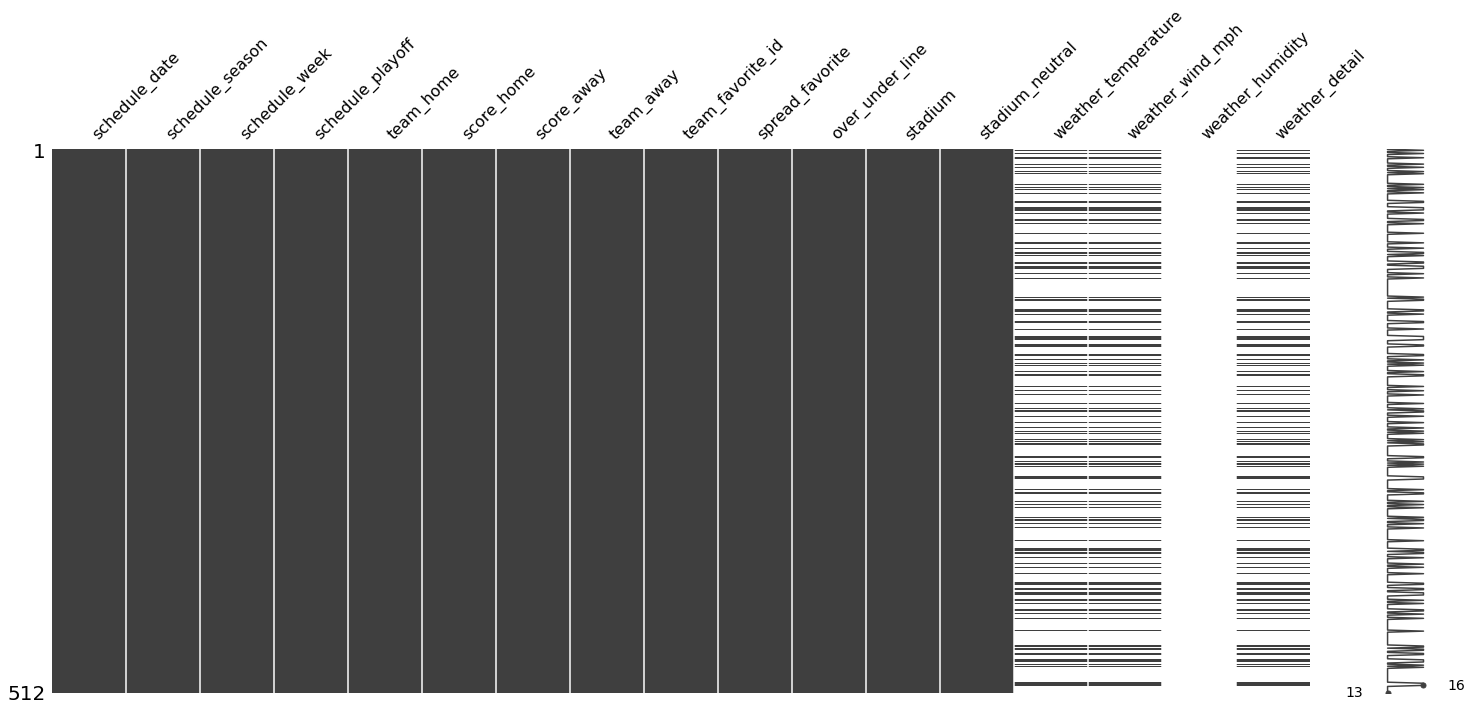

In [24]:
msno.matrix(df) # print a missing numbers matrix to show where missing numbers are

Null values strategy:   
weather_temperature - find non-dome temperatures (NOAA or CMU)   
weather_wind_mph - find non-dome wind speeds (NOAA or CMU)   
weather_humidity - find humidity percentages
weather_detail - fill in non-Dome with non-dome